In [16]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [17]:
np.random.seed(42)

In [18]:
# --------- Ito process function ---------
def ito_step(p, mu, sigma, dt):
    """Simulate one step of an Ito process for edge probability."""
    dW = np.random.normal(0, np.sqrt(dt))  # Brownian motion increment
    dp = mu * dt + sigma * dW              # Ito process update
    p_new = np.clip(p + dp, 0, 1)          # Keep probability in [0, 1]
    return p_new

In [19]:
# --------- Graph initialization ---------
def initialize_graph(n):
    G = nx.Graph()
    G.add_nodes_from(range(n))
    return G

In [20]:
# --------- Initialize edge probabilities ---------
def initialize_probabilities(n):
    probs = {}
    for i in range(n):
        for j in range(i + 1, n):
            probs[(i, j)] = np.random.uniform(0.1, 0.9) #Update with custom probability distribution
    return probs

In [21]:
# --------- Update edges based on probabilities ---------
def update_edges(G, probs):
    G.clear_edges()
    for (i, j), p in probs.items():
        if np.random.rand() < p:
            G.add_edge(i, j)

In [22]:
# --------- Main simulation function ---------
def simulate_dynamic_graph(n, steps=100, dt=0.01, mu=0.0, sigma=0.1, visualize=False):
    G = initialize_graph(n)
    probs = initialize_probabilities(n)

    for t in range(steps):
        # Update probabilities using Ito process
        for key in probs:
            probs[key] = ito_step(probs[key], mu, sigma, dt)

        # Update graph edges
        update_edges(G, probs)

        # Optional visualization during simulation
        if visualize and t % 10 == 0:
            plt.figure(figsize=(5, 5))
            nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')
            plt.title(f"Graph at Step {t}")
            plt.show()

    return G, probs

In [48]:
n = 20  # Number of nodes
steps = 100
dt = 0.01
mu = 0.01
sigma = 0.1

final_graph, final_probs = simulate_dynamic_graph(n, steps, dt, mu, sigma, visualize=False)

In [49]:
import copy
final_graph_frozen = copy.deepcopy(final_graph)

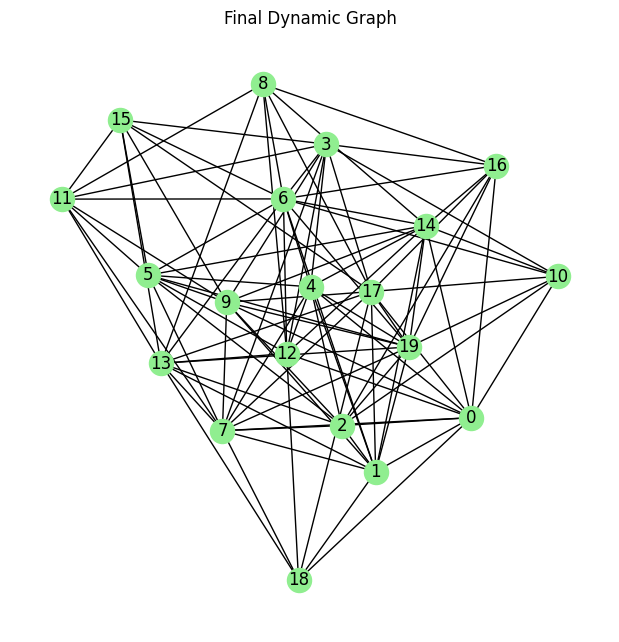

In [50]:
import matplotlib.pyplot as plt
import networkx as nx

# Use fixed layout
pos = nx.spring_layout(final_graph, seed=42)

plt.figure(figsize=(6, 6))
nx.draw(final_graph, pos=pos, with_labels=True, node_color='lightgreen', edge_color='black')
plt.title("Final Dynamic Graph")
plt.show()